# Lab 1: Part B
In this part of the lab we will be using maximum a posteriori (MAP). This allows us to introduce prior information we may have about the parameters. We shall use the Normal Inverse Gamma as our conjugate prior.

PLEASE limit your use of built-in functions, so use built-in gamma that we mentioned in class if you like, but not more complicated or convenience functions like `scipy.stats.norm.pdf` etc.

In [17]:
%load_ext autoreload
%autoreload 2

# For matrices
import numpy as np

# For plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=15)

# Our custom modules
from normal import *
from log_normal import *
from normal_inv_gamma import *
from plot_normal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Generate some data points from a normal distribution
mu = 1     # mean
sigma = 1  # standard deviation = sqrt(variance)
N = 5      # number of datapoints

X = mu + sigma*np.random.randn(N,1)

In [19]:
# parameters for prior - normal inverse gamma
alpha = 1
beta = 1
gamma = 1
delta = 0

## MAP Parameter Estimation of univariate normal

### TODO 1 
On paper derive the MAP parameter estimates for the normal distribution using the normal inverse gamma prior and then insert the equations below

In [57]:
# Replace this
muML = (1/N)*np.sum(X)
sigmaML = ((1/N)*np.sum((X-muML)*(X-muML)))**0.5
muMAP = np.sum(X)/(N+1)
sigmaMAP = ( (muMAP**2 + 2 + np.sum((X-muMAP)**2) )/(N+5) )**0.5

Text(0.5, 1.0, 'MAP & ML parameter fitted distribution')

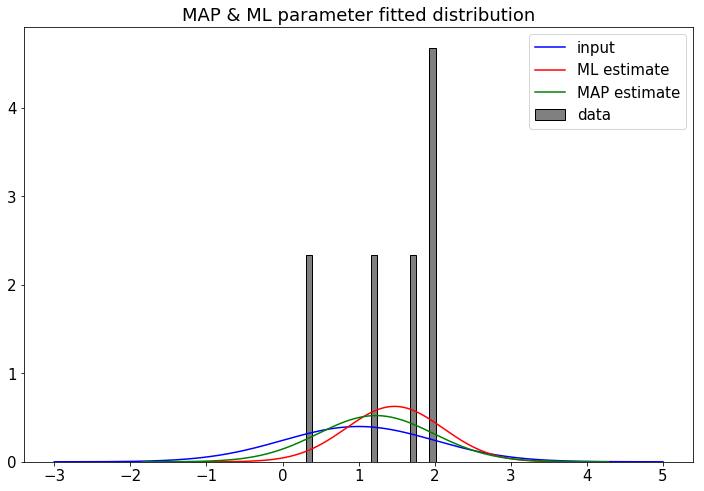

In [58]:
# Plotting univariate normal
# Normalizing histograms - assuming bins are evenly sized
[hist_count, bin_edges] = np.histogram(X, 20)
bin_width = bin_edges[1] - bin_edges[0]
hist_pos = (bin_edges[1:] + bin_edges[:-1]) / 2.

# Plot figure
plt.bar(bin_edges[:-1], hist_count/(np.sum(hist_count)*bin_width), color='gray', 
        edgecolor='k', width=bin_width, label='data')
plot_normal(mu, sigma, 'b', 'input')
plot_normal(muML, sigmaML, 'r', 'ML estimate')
plot_normal(muMAP, sigmaMAP, 'g', 'MAP estimate')
plt.legend()
plt.title('MAP & ML parameter fitted distribution')


In [59]:
# Domain of likelihood function
sigma_range = np.linspace(0.02, 2., num=200)
mu_range = np.linspace(-2., 2., num=400)

### Note
Again the __TODOs__ are calling for you to dig into the functions called within the for-loops.

### TODO 2
Compute the probability density for the prior: See `normal_inv_gamma.py`

In [60]:
lfun = np.zeros((len(sigma_range), len(mu_range)))
prior = np.zeros((len(sigma_range), len(mu_range)))

#aaa=0
for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        lfun[j,i] = normal(X, m, s)
        prior[j,i] = normal_inv_gamma(alpha, beta, delta, gamma, m, s)  # Edit normal_inv_gamma
    #aaa += sum(lfun[:,i])
    #print(sum(lfun[:,i]), sum(prior[:,i]))

        

### TODO 3 
Compute the posterior explicitly using a brute force approach

In [61]:
# p(x|mu,sigma) = F * p(mu,sigma|x) * p(x|mu,sigma)
posterior = np.zeros((len(sigma_range), len(mu_range)))
for i, _ in enumerate(mu_range):
    for j, _ in enumerate(sigma_range):
        posterior[j,i] = lfun[j,i]*prior[j,i]

#posterior = posterior/sum(posterior) #normalizing

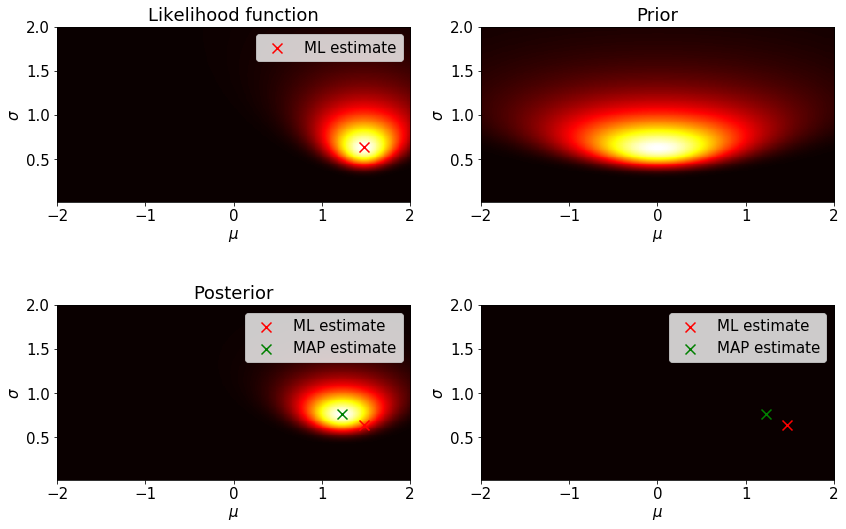

In [62]:
# Plot likelihood function
plt.subplot(2,2,1)
plt.imshow(lfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Likelihood function")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.legend()



# Plot prior
plt.subplot(2,2,2)
plt.imshow(prior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Prior")



# Plot posterior
plt.subplot(2,2,3)
plt.imshow(posterior, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Posterior")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()



# Plot likelihood function
plt.subplot(2,2,4)
plt.imshow(np.zeros(lfun.shape), cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")

## Plot points
plt.scatter(muML, sigmaML, color='r', marker='x', s=100, label='ML estimate')
plt.scatter(muMAP, sigmaMAP, color='g', marker='x', s=100, label='MAP estimate')
plt.legend()

# Prevent subplots from bunching up
plt.tight_layout()

### TODO 4
Empirically verify that the maximum of the posterior is at the same position as your MAP solution

### TODO 5
Comment on the effects of introducing the prior as the number of datapoints is low as compared to high
 